# Determining the Future of Loadshedding by Exploring the Supply and Demand of Electricity in South Africa

#### Compiled By:
    Siphesihle Ndhlovu (1599603)
    Mtuthuko Mngomezulu (1422811)
    Kabelo Sealetsa (1374863)

## Executive Summary & Introduction 

There are numerous factors and elements which contribute to the socio-economic wellness of the people of South Africa that can significantly affect how well and how long we live. For this assignment in particular, we will conduct a comparative analysis on the changes of supply and demand of electricity before and during the hard national lockdown due to the global COVID 19 pandemic. We will be using data that has been tweaked to show this on a monthly basis over a period of 6 years. 

Now, as a last resort, load shedding occurs when customer-demands for electricity exceeds the supply available from coal-fired generators which - if aren't controlled in this manner - may yield the consequence of a [total collapse of the national powergrid](https://www.eskom.co.za/sites/publicdata/Pages/default.aspx). Therefore we would further like to create a model that can predict whether the country might experience more outages in future based on forecasted and actual available electricity from Eskom using aforementioned datafrom the last 6 years(2017-2020).


##### Research Questions:


Important questions we hope to answer from the dataset are: <br/>

-How does the dispatched electricity(supply) during the lockdown compare to the actual demand for electricity? <br/>

-How does supply and demand of electricity from previous years differ from the supply and demand of electricity during lockdown? <br/>

-Should we expect more power outages in years to come in South Africa? <br/>


## Hypothesis:


Sinnce we will make use of multiple regression, we want to show that the null hypothesis of our project is that our model will have a slope equal zero. This can be interpreted as the exploratory variables do not have a relationship with the response variable. The alternative hypothesis is that these variables, on the other hand, do in fact have a relationship with the response variable and that the slope of our model is not equal to zero. 
We write this formally as follows:

$$
\begin{array}{l}{\mathrm{H}_{\mathrm{0}} : \mathrm{B}_{1}=0} \\ {\mathrm{H}_{\mathrm{1}} : \mathrm{B}_{1} \neq 0}\end{array}
$$



## Overview of Methodology

Before comparing lockdown data with data from the years prior, we hope to analyse the relationship between Dispatchable energy(supply) with the demand from consumers during this lockdown period. We're predicting that this will give us an answer to the question of how effectively Eskom was able to provide electricity for the people of South Africa.

We will then compare these results to the years before and try to spot any similarities or differences of the energy needs and supply of the country. This can be extended to the consideration of the influence of  factors such as changes in energy from renewable resources, importing and exporting of coal and the rate of coal production as theese are the main contributing factors to the overall production of electricity.

It is from these results that will lead us to the hypothesis that perhaps the lockdown had some effect on the supply and demand of electricity due to the expected decrease in productivity of industries and people. If the supply doesn't meet the demand, we can hypothesize that this might be one of the reasons that caused power outages over the years and perhaps project if we are to expect future outages.

### Steps:
A brief overview of the methodology is as follows:<br/>
1. Data Exploration <br/>
2. Exploratory plots of data distribution <br/>
4. Modelling Dataset for outcome prediction <br/>

Discussions of each step will be found in the relevant sections below.


### Description of Data:

The datset that we will be using for this research is from the Statssa and Eskom websites, which is based on the amount of electricity that is generated and the used in South Africa throughout the years. It also shows the different ways electricity is generated through renewable fuel sources as a means of cutting costs and reducing the usage of non-renewable energy. Most, however, of our electricity is still being produced through coal-fired generators. 

In [238]:
#This cell enables us to toggle code cells on and off
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 1. Data Exploration:

In [239]:
from __future__ import print_function, division
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML, Javascript
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import weightstats as stests

Eskom generated the data from its the avarage amount of electricity that it produces hourly in South Africa. The raw data has 17565 rows and 42 columns describing supply and demand, and also providing predictions of the future avarege demand. Though there are a number fields with null values, the same unit of calculation was used and the data is consistent throughout the entire fields. This data was obtained from the Eskom official website on the 02 April 2021.

Preprocessing involved dropping some values from the raw data expecially future prediction (forcast of data demand in 2022).
For the sake of uniformity, we will be looking at Eskom data from 30-03-2020 to 30-03-2021.

In [240]:
#Raw Data Imports
    #Supply 2015-2020
df1 = pd.read_csv("Generated(PrevYears).csv")
    #Lockdown data
df2 = pd.read_csv("System_status_and_other_related_data_Previous_and_Current_FY.csv")


#Copying the System_status_and_other_related_data_Previous_and_Current_FY data set
df1_copy = df1.copy()
df2_copy = df2.copy()

#converting column of data 2017-2020 into series
df1_copy.rename(columns={"Date Time Hour Beginning": "DateTimeHourBeginning"}, inplace = True)
df1_copy[['Date','Time', 'Hour Beginning']] = df1_copy.DateTimeHourBeginning.str.split(" ",expand=True)
df1_copy['Date']= pd.to_datetime(df1_copy['Date'])
df1_copy = df1_copy.set_index('Date')
df1_copy.drop("Time" , axis='columns', inplace=True)
df1_copy.drop("Hour Beginning", axis='columns', inplace=True)

df1_copy=df1_copy.drop("DateTimeHourBeginning", axis ="columns")

#Replaced all the NAN values with the mean value of each column to mitigate missing data.
df2_copy['Dispatchable Generation'].fillna(df2_copy['Dispatchable Generation'].mean(),  inplace = True)
i = 1
for i in range(len(df2_copy.columns)):
    if i != 0:
        df2_copy.iloc[:,i].fillna(df2_copy.iloc[:,i].mean(),inplace =True)
#Now we drop cols won't really be used during this assignment
col_num = 0
for col in df2_copy.columns:
    col_num+=1
    if col_num == 11 or col_num == 12 or col_num == 15 or col_num == 16 or col_num == 17 or col_num == 18 or col_num == 23 or col_num == 24 or col_num == 25 or col_num == 31 or col_num == 32 or col_num == 40 or col_num == 41:
        df2_copy.drop(col, axis='columns', inplace=True)

#Creating A Date Column so we can make it our index
df2_copy.rename(columns={"Date Time Hour Beginning": "DateTimeHourBeginning"}, inplace = True)
df2_copy[['Date','Time Hour Beginning']] = df2_copy.DateTimeHourBeginning.str.split(" ",expand=True)
df2_copy['Date']= pd.to_datetime(df2_copy['Date'])
df2_copy = df2_copy.set_index('Date')
df2_copy.drop("Time Hour Beginning", axis='columns', inplace=True)
df2_copy=df2_copy.drop("DateTimeHourBeginning", axis ="columns")

#Data set predicting the future supply and demand
df3_copy = df2_copy.iloc[8784:,:]

#drop data after 2021-03-30:
df2_copy = df2_copy.iloc[:8784,:]

df3_copy

,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,Eskom OCGT Generation,...,Total UCLF,Total OCLF,Hydro Water SCO,Pumped Water SCO Pumping,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Non Comm Sentout
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,22280.154,21172.834,21891.003,21016.335000,21016.335000,21864.958000,1308.619000,1116.000000,21738.000000,0.000000,...,11479.133000,1255.983000,0.0,-2753.000000,848.623000,2612.740000,2212.090000,500.0,25.580000,1093.00000
2021-03-31,21922.070,20987.677,21667.693,20643.801000,20643.801000,21398.770000,1234.902000,1117.000000,21358.000000,0.000000,...,11478.726000,1255.983000,0.0,-2746.000000,754.969000,2612.740000,2212.090000,500.0,25.580000,1094.00000
2021-03-31,21863.202,20945.232,21601.015,20708.065000,20708.065000,21377.796000,1203.769000,1124.000000,21405.730000,0.000000,...,11474.573000,1219.899000,0.0,-2737.000000,669.731000,2612.740000,2212.090000,500.0,25.580000,1094.00000
2021-03-31,22121.649,21149.297,21768.290,20967.801000,20967.801000,21535.995000,1210.976000,1134.000000,21599.000000,0.000000,...,11518.413000,1201.857000,0.0,-2681.000000,568.194000,2612.740000,2212.090000,500.0,25.580000,1095.00000
2021-03-31,23014.528,22210.152,22773.247,22171.468000,22171.468000,22685.817000,1307.071000,1126.000000,22070.000000,0.000000,...,11535.507000,1207.811000,0.0,-1941.000000,514.349000,2612.740000,2212.090000,500.0,25.580000,1095.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,30426.667,28940.729,30744.200,23334.665082,23466.936263,24964.066785,1468.856557,1086.004021,20919.915934,164.695849,...,9123.802432,1542.111213,0.0,-771.722855,1497.130522,2255.331367,1939.204209,500.0,22.197694,664.48805
2022-03-31,28688.888,27098.550,28808.286,23334.665082,23466.936263,24964.066785,1468.856557,1086.004021,20919.915934,164.695849,...,9123.802432,1542.111213,0.0,-771.722855,1497.130522,2255.331367,1939.204209,500.0,22.197694,664.48805
2022-03-31,26437.361,25204.781,26763.478,23334.665082,23466.936263,24964.066785,1468.856557,1086.004021,20919.915934,164.695849,...,9123.802432,1542.111213,0.0,-771.722855,1497.130522,2255.331367,1939.204209,500.0,22.197694,664.48805


We shall first look at the forecasted demand of electricity by people, actual demand and what was eventually generated by Eskom:

In [241]:
#create new dataframe to store the desired columns
df4 = pd.DataFrame(columns = ['RSA Contracted Forecast', 'RSA Contracted Demand', 'Dispatchable Generation', 'Total PCLF', 'Total UCLF', 'Total OCLF'])
df4['RSA Contracted Forecast'] = df2_copy['RSA Contracted Forecast']
df4['RSA Contracted Demand'] = df2_copy['RSA Contracted Demand']
df4['Dispatchable Generation'] = df2_copy['Dispatchable Generation']
df4['Total OCLF'] = df2_copy['Total OCLF']
df4['Total PCLF'] = df2_copy['Total PCLF']
df4['Total UCLF'] = df2_copy['Total UCLF']
df4 = df4.resample("M").mean()

df6 = pd.DataFrame(columns = ['RSA Contracted Forecast', 'RSA Contracted Demand', 'Dispatchable Generation', 'Total PCLF', 'Total UCLF', 'Total OCLF'])
df6['RSA Contracted Forecast'] = df1_copy['RSA Contracted Forecast']
df6['RSA Contracted Demand'] = df1_copy['RSA Contracted Demand']
df6['Dispatchable Generation'] = df1_copy['Dispatchable Generation']
df6['Total OCLF'] = df1_copy['Total OCLF']
df6['Total PCLF'] = df1_copy['Total PCLF']
df6['Total UCLF'] = df1_copy['Total UCLF']
df6 = df6.resample("M").mean()

supplyLD=df4['Dispatchable Generation']
supplyPre=df6["Dispatchable Generation"]

demandLD=df4['RSA Contracted Demand']
demandPre=df6["RSA Contracted Demand"]




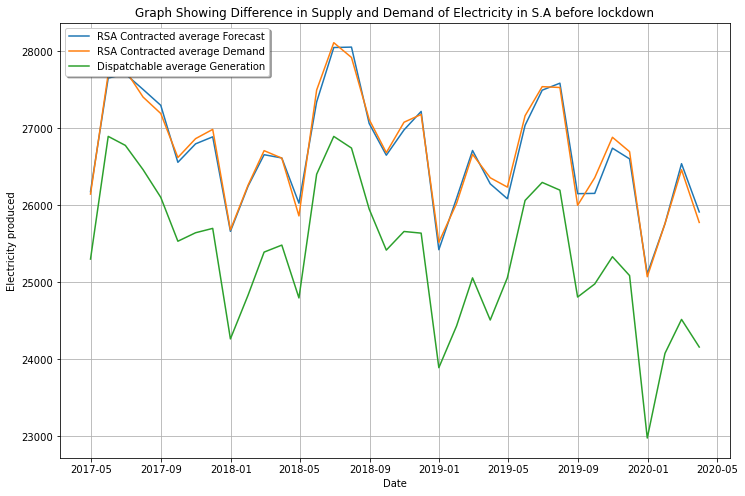

In [242]:
plt.figure(figsize=(12,8))
plt.plot(df6['RSA Contracted Forecast'], label = 'RSA Contracted average Forecast')
plt.plot(df6['RSA Contracted Demand'], label = 'RSA Contracted average Demand')
plt.plot(df6['Dispatchable Generation'], label = 'Dispatchable average Generation')
plt.legend(loc='upper left', shadow = True)
plt.ylabel('Electricity produced')
plt.xlabel('Date')
plt.title("Graph Showing Difference in Supply and Demand of Electricity in S.A before lockdown")

plt.grid()

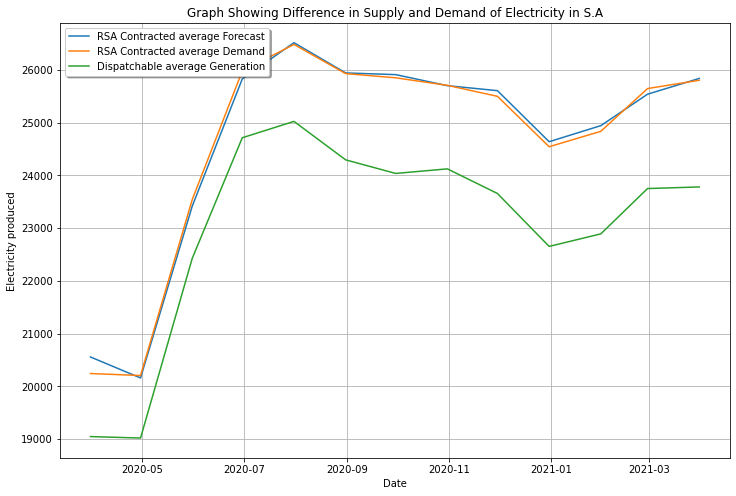

In [243]:
plt.figure(figsize=(12,8))
plt.plot(df4['RSA Contracted Forecast'], label = 'RSA Contracted average Forecast')
plt.plot(df4['RSA Contracted Demand'], label = 'RSA Contracted average Demand')
plt.plot(df4['Dispatchable Generation'], label = 'Dispatchable average Generation')
plt.legend(loc='upper left', shadow = True)
plt.ylabel('Electricity produced')
plt.xlabel('Date')
plt.title("Graph Showing Difference in Supply and Demand of Electricity in S.A")

plt.grid()


This gives us a clear indication of how the demand was much higher than what Eskom was able to provide during the S.A lockdown period.

## 2. Exploratory Plots of Data Distribution

In this section, we explore and contrast the relationships between data prior to the lockdown with data during the lockdown.

First we compare different energy losses eperienced by Eskom. Further explanations of each abbreviation can be found in the [glossary of terms](https://www.eskom.co.za/dataportal/glossary/) on the Eskom data portal.

OCLF: Other Capability Loss Factors of Eskom plant. <br/>
PCLF: Planned Capability Loss Factor of Eskom plant <br/>
UCLF: Unplanned Capability Loss Factor of Eskom plant<br/>


In [244]:
#During Lockdown:

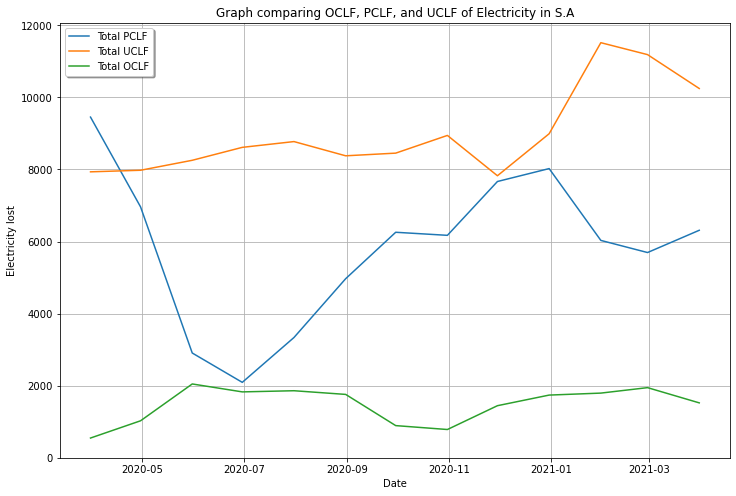

In [245]:
plt.figure(figsize=(12,8))
plt.plot(df4['Total PCLF'], label = 'Total PCLF')
plt.plot(df4['Total UCLF'], label = 'Total UCLF')
plt.plot(df4['Total OCLF'], label = 'Total OCLF')
plt.legend(loc='upper left', shadow = True)
plt.ylabel('Electricity lost')
plt.xlabel('Date')
plt.title("Graph comparing OCLF, PCLF, and UCLF of Electricity in S.A")
plt.grid()

In the above plot, we see that of the three losses experienced by the Eskom plant, most are due to unplanned events. This is when the plant would then resort to emergency [load reduction](https://loadshedding.eskom.co.za/loadshedding/Description) as explained by the supplier. These unplanned losses began spiking after 2018 and shows a steady growth trend as the years progress.

In [246]:
def pmf(dataframe):
    probability = dataframe / len(dataframe)
    pmf = pd.Series(data=probability.round(decimals=5))
    return pmf

/home/siphesihle/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/siphesihle/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graph showing the distribution of the supply and demand for energy before lockdo')

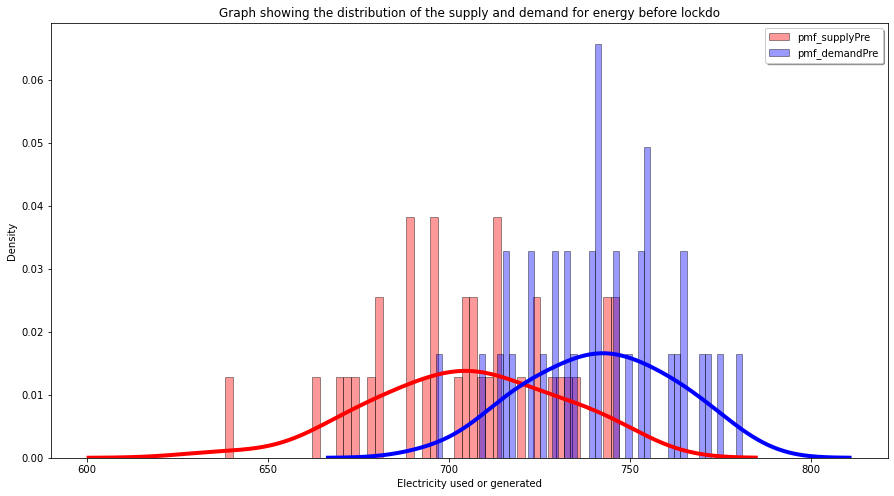

In [247]:
pmf_demandPre = pmf(demandPre)
pmf_supplyPre = pmf(supplyPre)

plt.figure(figsize=(15,8))
sns.distplot(pmf_supplyPre, label = 'pmf_supplyPre', hist=True, kde=True, 
            bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(pmf_demandPre, label = 'pmf_demandPre', hist=True, kde=True, 
            bins=50, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.xlabel('Electricity used or generated')
plt.legend(shadow=True)
plt.title("Graph showing the distribution of the supply and demand for energy before lockdo")

In [248]:
#Discrete random variables
supplyLD=df4['Dispatchable Generation']
supplyPre=df1_copy["Dispatchable Generation"]
demandLD=df4['RSA Contracted Demand']
demandPre=df1_copy["RSA Contracted Demand"]

pmf_demandLD = pmf(demandLD)
pmf_supplyLD = pmf(supplyLD)

/home/siphesihle/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/siphesihle/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graph showing the distribution of the supply and demand for energy during lockdown')

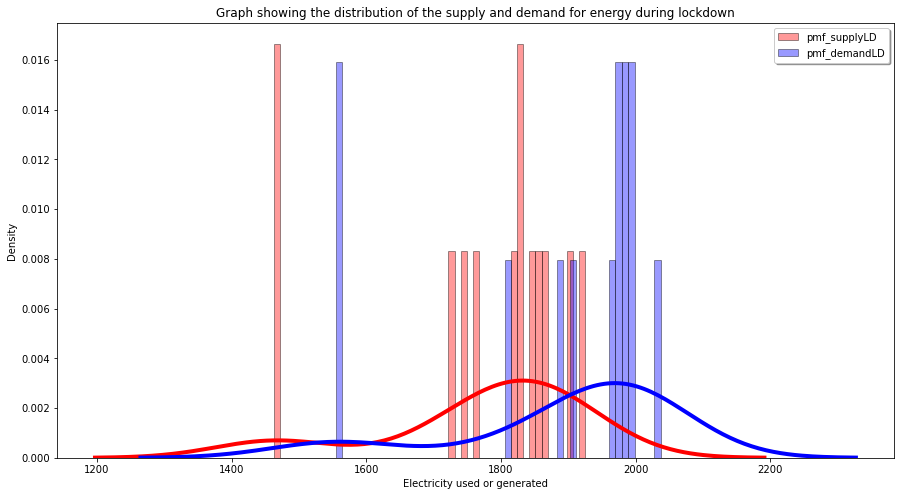

In [249]:
plt.figure(figsize=(15,8))
sns.distplot(pmf_supplyLD, label = 'pmf_supplyLD', hist=True, kde=True, 
            bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(pmf_demandLD, label = 'pmf_demandLD', hist=True, kde=True, 
            bins=50, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.xlabel('Electricity used or generated')
plt.legend(shadow=True)
plt.title("Graph showing the distribution of the supply and demand for energy during lockdown")

## 3. Model fitting

In the next section, we fit a Ordinary Least Squares regression model to dataset and analyse its slope as a means to answer the research question.

First step is to combine dataset from before the national lockdown began with data during lockdown to get one large dataset. We then train a model using this and compare it with Eskom's forecast of Dispatchable Generation and analyse

To ensure that we choose features that correlate with the output 'Dispatchable Generation', we analyse each feature in our dataset and choose those wih correlation greater than 0.5 

In [250]:
data =  pd.concat([df1_copy,df2_copy],ignore_index=False)
data=data.fillna(data.mean())
data=data.drop(["Original Res Forecast before Lockdown", "Residual Forecast", "RSA Contracted Forecast","Residual Demand","RSA Contracted Demand"],axis = 1)
data

,Dispatchable Generation,Thermal Generation,Nuclear Generation,Eskom Gas Generation,Eskom OCGT Generation,Hydro Water Generation,Pumped Water Generation,Total RE,Total PCLF,Total UCLF,...,CSP,Ingula Gen Unit Hours,Installed Eskom Capacity,Hydro Water SCO,Pumped Water SCO Pumping,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Other RE Installed Capacity,Non Comm Sentout
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-01,22481.620,20762.08,1578.000000,0.000000,0.0,0.0,0.000000,304.287,5022.368,3544.365,...,190.082837,34.133158,45236.745902,0.0,-771.450478,2248.495683,1933.985082,500.0,22.133005,665.500911
2017-04-01,21919.700,20636.90,1576.000000,0.000000,0.0,0.0,0.000000,425.110,5025.535,3086.385,...,190.082837,34.133158,45236.745902,0.0,-771.450478,2248.495683,1933.985082,500.0,22.133005,665.500911
2017-04-01,21808.030,20511.49,1575.000000,0.000000,0.0,0.0,0.000000,434.061,5025.535,3073.885,...,190.082837,34.133158,45236.745902,0.0,-771.450478,2248.495683,1933.985082,500.0,22.133005,665.500911
2017-04-01,21872.130,20586.46,1574.000000,0.000000,0.0,0.0,0.000000,382.520,5025.535,2822.285,...,190.082837,34.133158,45236.745902,0.0,-771.450478,2248.495683,1933.985082,500.0,22.133005,665.500911
2017-04-01,22230.290,20942.75,1575.000000,0.000000,0.0,0.0,0.000000,324.398,5025.535,2670.174,...,190.082837,34.133158,45236.745902,0.0,-771.450478,2248.495683,1933.985082,500.0,22.133005,665.500911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-30,27876.948,22933.00,1482.843122,0.174551,286.0,455.0,541.381779,1276.326,4497.863,11470.489,...,349.374000,19.410000,45646.000000,0.0,-20.000000,2612.740000,2212.090000,500.0,25.580000,1091.000000
2021-03-30,26432.363,22448.00,1482.843122,0.174551,288.0,156.0,541.381779,1096.736,4497.863,11710.490,...,278.435000,18.800000,45646.000000,0.0,-20.000000,2612.740000,2212.090000,500.0,25.580000,1092.000000
2021-03-30,24852.560,22321.00,1482.843122,0.174551,165.0,0.0,541.381779,882.317,4497.863,11695.043,...,236.480000,18.590000,45646.000000,0.0,-155.000000,2612.740000,2212.090000,500.0,25.580000,1091.000000


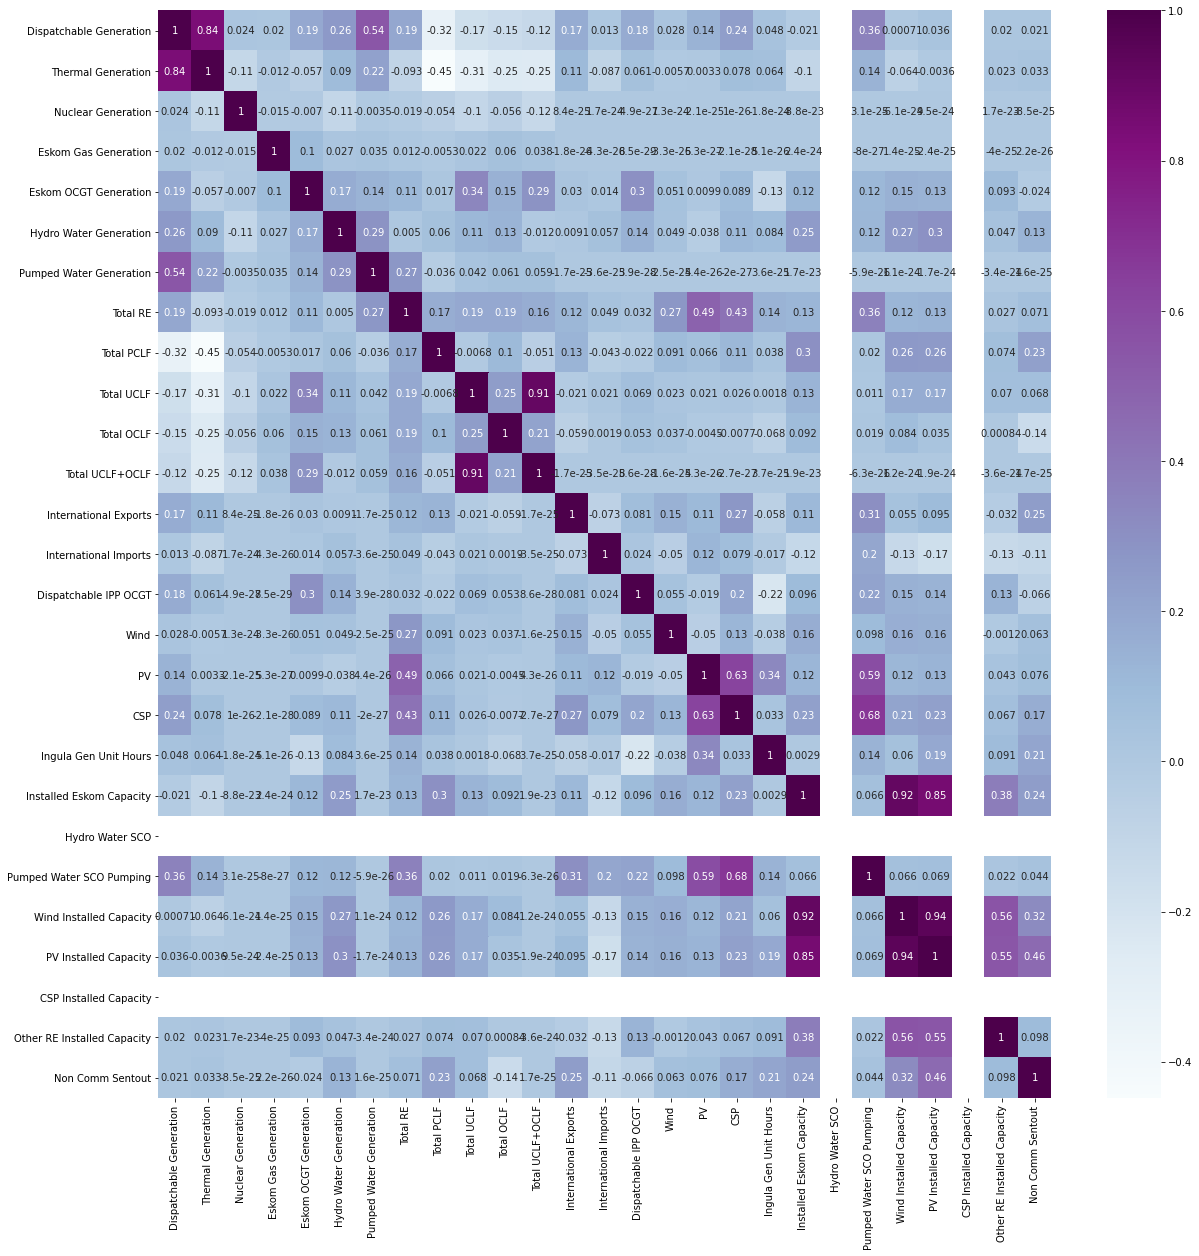

In [251]:
#we assess feature correlation in order to choose best features for training the model

#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor =data.corr()
sns.heatmap(cor, annot=True, cmap="BuPu")
plt.show()

In [252]:
cor_target = abs(cor["Dispatchable Generation"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>=0.5]
relevant_features

Dispatchable Generation    1.000000
Thermal Generation         0.838355
Pumped Water Generation    0.543741
Name: Dispatchable Generation, dtype: float64

As we can see, only the features Thermal Generation and Pumped Water Generation are highly correlated with the output variable  Dispatchable Generation. Hence we will drop all other features apart from these. This, however, is not the end of the process. One of the assumptions of linear regression is that the [independent variables need to be uncorrelated with each other](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

In [253]:
data_copy = data[["Dispatchable Generation","Thermal Generation","Pumped Water Generation"]]
data_copy.corr()

,Dispatchable Generation,Thermal Generation,Pumped Water Generation
Dispatchable Generation,1.000000,0.838355,0.543741
Thermal Generation,0.838355,1.000000,0.223024
Pumped Water Generation,0.543741,0.223024,1.000000


The above table shows that We should keep Thermal Generation and Pumped Water SCO as these 2 features have a higher correlation coefficient with our output value

In [254]:
data_copy

,Dispatchable Generation,Thermal Generation,Pumped Water Generation
Date,,,
2017-04-01,22481.620,20762.08,0.000000
2017-04-01,21919.700,20636.90,0.000000
2017-04-01,21808.030,20511.49,0.000000
2017-04-01,21872.130,20586.46,0.000000
2017-04-01,22230.290,20942.75,0.000000
...,...,...,...
2021-03-30,27876.948,22933.00,541.381779
2021-03-30,26432.363,22448.00,541.381779
2021-03-30,24852.560,22321.00,541.381779


Next, we assign new variables to denote the input values (X) and output values(Y) of our model and fit an Ordinary Least Squares Regression Line on our data.

First, we split 70% of the data to be used for training and 30% of the data to be used for testing

In [255]:
Y = data_copy["Dispatchable Generation"]
X = data_copy[["Thermal Generation" ,"Pumped Water Generation"]]

#split data: 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [256]:
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print_model = model.summary()
print(print_model)


                               OLS Regression Results                              
Dep. Variable:     Dispatchable Generation   R-squared:                       0.837
Model:                                 OLS   Adj. R-squared:                  0.837
Method:                      Least Squares   F-statistic:                 6.281e+04
Date:                     Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                             22:06:05   Log-Likelihood:            -2.1003e+05
No. Observations:                    24528   AIC:                         4.201e+05
Df Residuals:                        24525   BIC:                         4.201e+05
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [257]:
parameters = model.params
#We now test our model on unseen data

x_test = sm.add_constant(x_test)

ypred = (model.predict(x_test)).sort_index()

In [258]:
print("The estimated Ordinary Least Squares regression line is of the form: \n")
print("Y_t = ", parameters[0], " + ", parameters[1], "x1_t + ", parameters[2], "x2_t \n")
print("It has a positive slope, which indicates a positive relationship between the response variable and exploratory variables")

The estimated Ordinary Least Squares regression line is of the form: 

Y_t =  -730.048985907496  +  1.0950448420111414 x1_t +  2.242151716238849 x2_t 

It has a positive slope, which indicates a positive relationship between the response variable and exploratory variables


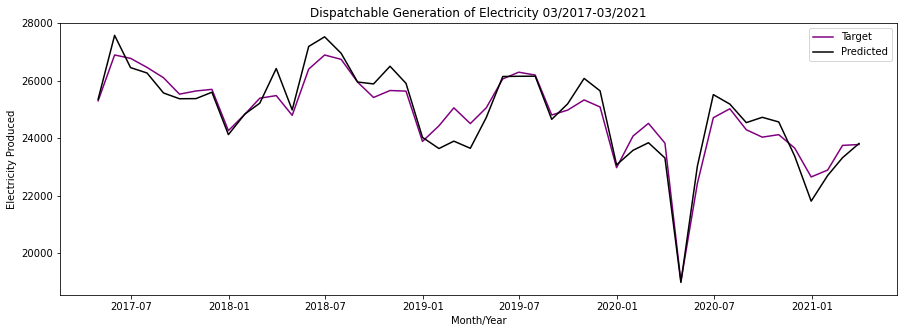

In [259]:
Y = Y.resample("M").mean()
ypred = ypred.resample("M").mean()


plt.figure(figsize=(15,5))
plt.plot(Y.index,Y, color='purple',label="Target")
plt.title("Dispatchable Generation of Electricity 03/2017-03/2021")
plt.plot(ypred,color='black', label="Predicted")
plt.legend(loc='upper right')
plt.ylabel("Electricity Produced")
plt.xlabel("Month/Year")
plt.show()

The above Time Series Plot gives an analysis of how our model performed against real data. We assess domain specific inferences for biases that could have an influence on our interpretation. 

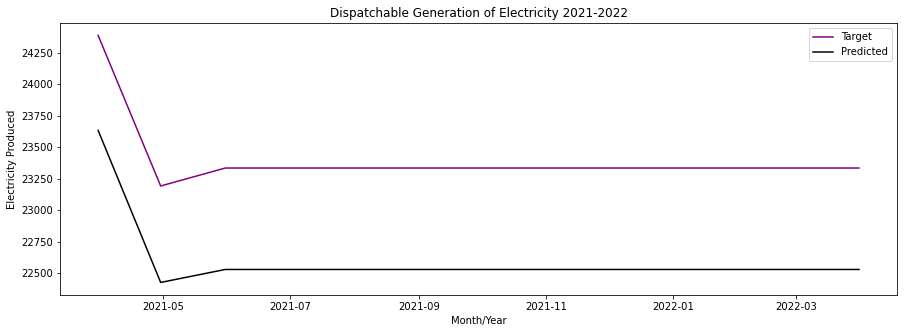

In [260]:
yF=df3_copy["Dispatchable Generation"]
xF=df3_copy[["Thermal Generation" ,"Hydro Water Generation"]]
xF = sm.add_constant(xF)

yF = yF.resample("M").mean()

ypredFuture = (model.predict(xF)).sort_index()
ypredFuture =ypredFuture.resample("M").mean()

plt.figure(figsize=(15,5))
plt.plot(yF.index,yF, color='purple',label="Target")
plt.title("Dispatchable Generation of Electricity 2021-2022")
plt.plot(ypredFuture,color='black', label="Predicted")
plt.legend(loc='upper right')
plt.ylabel("Electricity Produced")
plt.xlabel("Month/Year")
plt.show()

The above diagram shows what our model predicts will happen in future. It shows that less electricity will be produced than what Eskom forecasted

# Hypothesis testing

There are different types of hypethesis testing methods, 
* Z-test, t-test, and f-test.

A z-test is used for testing the mean of a population versus a standard, or comparing the means of two populations, with large (n ≥ 30) samples whether you know the population standard deviation or not. It is also used for testing the proportion of some characteristic versus a standard proportion, or comparing the proportions of two populations

A t-test is used for testing the mean of one population against a standard or comparing the means of two populations if you do not know the populations’ standard deviation and when you have a limited sample (n < 30). If you know the populations’ standard deviation, you may use a z-test.

An F-test is used to compare 2 populations’ variances. The samples can be any size. and this is done on the basis of ANOVA.

But in this scenario the method to be used will be the ztest because:

    + the size of the dataset is > 30
    
    + the data points are independent of each other
    
    + the sample was randomly chosen from a population
    

We use the average electricity supplied as the assumed mean, this mean will tell us if the supply will 
be lower than the demand or the otherway round. Using this assumed mean will help use the Z-test to calculate 
the p-value. If p-value > 0.05 we will accept the null hypothesis, else we reject the the null hypothesis.

In [261]:
ztest ,pval = stests.ztest(ypred, x2=None, value=df3_copy['Dispatchable Generation'].mean())
print('P-value:', pval)

if pval<0.05:
    print("reject null hypothesis") 
else:
    print("accept null hypothesis")

P-value: 9.353140364722599e-12
reject null hypothesis


The above p_test shows a value less than 0.05 which implies we should reject our null hypothesis. This matches with our predictions as we found that our coefficient values are in fact non-zero.

## 4. Conclusion

This notebook aimed at analysing and comparing trends between electricity demanded and supplied by Eskom. We further predicted that load reduction will still continue as we found that our model modelled a downward trend in electricity to be produced by the supplier.